## YouTube Streamer Analysis

### Introduction
This dataset contains valuable information about the Top 1000 YouTube streamers.

The dataset contains 9 columns namely:
1. Rank: Ranking of each account
2. Username: Account name of each Youtuber
3. Categories: Category of content created
4. Subscribers: Number of subscribers
5. Country: Country of the Youtubers
6. Visits: Number of Views
7. Likes: Numbers of Likes
8. Comments: Total numbers of comment
9. Links: link to the account

### Task
The task is to perform a comprehensive analysis to extract insights about the top YouTube content creators.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.0f}'.format # Suppress scientific notation

### Data Exploration:

- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

In [2]:
# Import the dataset
data = pd.read_csv("youtubers_df.csv")

# made a copy of the data
df = data.copy()

#check information about the data
df.info()

# view the data
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000,Estados Unidos,397400,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000,India,1100000,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000,Unknown,211400,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000,India,14000,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


the Categories and Country values are not in english so i translate them to english

i thought of using the googletrans library but i keep getting a timeout error due to the large dataset so i used an alternaive approach: getting the unique data in each columns and using ChatGPT to translate and convert them into dictionary 

In [3]:
categories_dict = { 
    'Música y baile': 'Music and Dance', 
    'Videojuegos, Humor': 'Video Games, Humor', 
    'Educación': 'Education',
    'Unknown': 'Unknown',
    'Animación, Juguetes': 'Animation, Toys',
    'Películas, Videojuegos': 'Movies, Video Games',
    'Juguetes': 'Toys',
    'Videojuegos': 'Video Games',
    'Películas, Animación': 'Movies, Animation',
    'Películas': 'Movies',
    'Noticias y Política': 'News and Politics',
    'Animación, Humor': 'Animation, Humor',
    'Música y baile, Animación': 'Music and Dance, Animation',
    'Música y baile, Películas': 'Music and Dance, Movies',
    'Películas, Juguetes': 'Movies, Toys',
    'Películas, Humor': 'Movies, Humor',
    'Vlogs diarios': 'Daily Vlogs',
    'Videojuegos, Juguetes': 'Video Games, Toys',
    'Animación, Videojuegos': 'Animation, Video Games',
    'Animación': 'Animation',
    'Música y baile, Humor': 'Music and Dance, Humor',
    'Diseño/arte, DIY y Life Hacks': 'Design/Art, DIY and Life Hacks',
    'Ciencia y tecnología': 'Science and Technology',
    'Fitness, Salud y autoayuda': 'Fitness, Health and Self-help',
    'Belleza, Moda': 'Beauty, Fashion',
    'Humor': 'Humor',
    'Comida y bebida': 'Food and Drink',
    'Deportes': 'Sports',
    'Fitness': 'Fitness',
    'Viajes, Espectáculos': 'Travel, Entertainment',
    'Comida y bebida, Salud y autoayuda': 'Food and Drink, Health and Self-help',
    'Diseño/arte': 'Design/Art',
    'DIY y Life Hacks, Juguetes': 'DIY and Life Hacks, Toys',
    'Educación, Juguetes': 'Education, Toys',
    'Juguetes, Coches y vehículos': 'Toys, Cars and Vehicles',
    'Música y baile, Juguetes': 'Music and Dance, Toys',
    'Animales y mascotas': 'Animals and Pets',
    'ASMR': 'ASMR',
    'Moda': 'Fashion',
    'DIY y Life Hacks': 'DIY and Life Hacks',
    'Diseño/arte, Belleza': 'Design/Art, Beauty',
    'Coches y vehículos': 'Cars and Vehicles',
    'Animación, Humor, Juguetes': 'Animation, Humor, Toys',
    'ASMR, Comida y bebida': 'ASMR, Food and Drink',
    'Comida y bebida, Juguetes': 'Food and Drink, Toys',
    'Juguetes, DIY y Life Hacks': 'Toys, DIY and Life Hacks'
}


# Function to translate Spanish words to English
def categories_to_english(word):
    return categories_dict.get(word, word) # Return the translated word if it exists,


# Apply the translation function to the 'Category' column
df['Categories'] = df['Categories'].apply(categories_to_english)

In [4]:
countries_dict = {
    'India': 'India',
    'Estados Unidos': 'United States',
    'Unknown': 'Unknown',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Rusia': 'Russia',
    'Pakistán': 'Pakistan',
    'Filipinas': 'Philippines',
    'Indonesia': 'Indonesia',
    'Tailandia': 'Thailand',
    'Francia': 'France',
    'Colombia': 'Colombia',
    'Iraq': 'Iraq',
    'Japón': 'Japan',
    'Ecuador': 'Ecuador',
    'Argentina': 'Argentina',
    'Turquía': 'Turkey',
    'Arabia Saudita': 'Saudi Arabia',
    'El Salvador': 'El Salvador',
    'Bangladesh': 'Bangladesh',
    'Reino Unido': 'United Kingdom',
    'Argelia': 'Algeria',
    'España': 'Spain',
    'Perú': 'Peru',
    'Egipto': 'Egypt',
    'Jordania': 'Jordan',
    'Marruecos': 'Morocco',
    'Singapur': 'Singapore',
    'Somalia': 'Somalia'
}

# Function to translate Spanish words to English
def countries_to_english(word):
    return countries_dict.get(word, word) # Return the translated word if it exist

# Apply the translation function to the 'Category' column
df['Country'] = df['Country'].apply(countries_to_english)

In [5]:
# View the first 5 rows of the now translated dataset
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Music and Dance,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Video Games, Humor",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Education,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animation, Toys",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [6]:
# checking the numbers of unique values in each columns
df.nunique()

Rank          1000
Username       994
Categories      45
Suscribers     274
Country         29
Visits         713
Likes          648
Comments       389
Links          994
dtype: int64

the username and links columns has some duplicated data. 

There should be a unique link for each youtubers so we remove all duplicates

In [7]:
# check for duplicates using the username column
df[df['Username'].duplicated(keep=False)] 

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
249,250,NickyJamTV,"Music and Dance, Movies",23700000,Colombia,15800,1200,58,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
250,251,NickyJamTV,"Music and Dance, Movies",23700000,Colombia,15800,1200,58,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
447,448,mgcplayhouse,"Toys, Cars and Vehicles",17800000,Unknown,56300,96,0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
449,450,thexoteam,NaN,17800000,United States,797600,50400,179,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
450,451,thexoteam,NaN,17900000,United States,772800,45000,185,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Toys, Cars and Vehicles",17800000,Unknown,63600,75,0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
946,947,Super_Senya_RU,"Animation, Toys",12100000,Unknown,47200,192,0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
947,948,HiTechIslamic,Music and Dance,12100000,Pakistan,62200,810,59,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
949,950,Family-Box,Movies,12000000,Russia,173600,6600,105,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...
952,953,Super_Senya_RU,"Animation, Toys",12100000,Unknown,47200,192,0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...


In [8]:
# drop all duplicates
df.drop_duplicates(subset=['Username'], inplace=True, ignore_index=True)

# check again to confirm the dataset is no more having duplicate data
df['Username'].duplicated().sum()

0

In [9]:
# drop the rank column
df.drop(columns='Rank', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    994 non-null    object 
 1   Categories  689 non-null    object 
 2   Suscribers  994 non-null    float64
 3   Country     994 non-null    object 
 4   Visits      994 non-null    float64
 5   Likes       994 non-null    float64
 6   Comments    994 non-null    float64
 7   Links       994 non-null    object 
dtypes: float64(4), object(4)
memory usage: 62.2+ KB


we are left with 994rows and 7cols, notice only the categories column is having missing values so i deal with the missing data and also correct the subscribers column name 

In [10]:
# check the total missing values
df['Categories'].isna().sum()

305

305 missing values, about 30% of the dataset, dropping them will reduce the dataset drastically and this may affect the accuracy of our analysis so i'll fill it with "Unknown"

In [11]:
df['Categories'].fillna('Unknown', inplace=True)

#check to confirm no more missing values in the dataset
df.isna().sum().sum()

0

In [12]:
# correcting the subscribers column name
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

df.head()

,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,tseries,Music and Dance,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,MrBeast,"Video Games, Humor",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,CoComelon,Education,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,SETIndia,Unknown,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,KidsDianaShow,"Animation, Toys",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


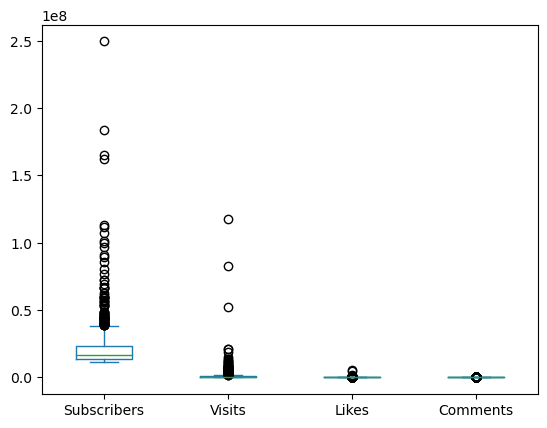

In [13]:
#checking for outliers i construct a boxplot

df.plot(kind='box');

there are hugh amount of outliers, this is understandable because content creator followers varies based on how their contents gains attraction.

### Trend Analysis:

- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [14]:
popular_categories = df['Categories'].value_counts()

popular_categories.head(10)

Categories
Unknown                    305
Music and Dance            159
Movies, Animation           61
Music and Dance, Movies     40
Daily Vlogs                 37
News and Politics           36
Movies, Humor               34
Animation, Video Games      34
Animation, Toys             28
Animation, Humor            27
Name: count, dtype: int64

The most popular categories are:
1. Music and Dance
2. Movies, Animation
3. Music and Dance, Movies
4. Daily Vlogs
5. News and Politics 

show this on a bar plot below

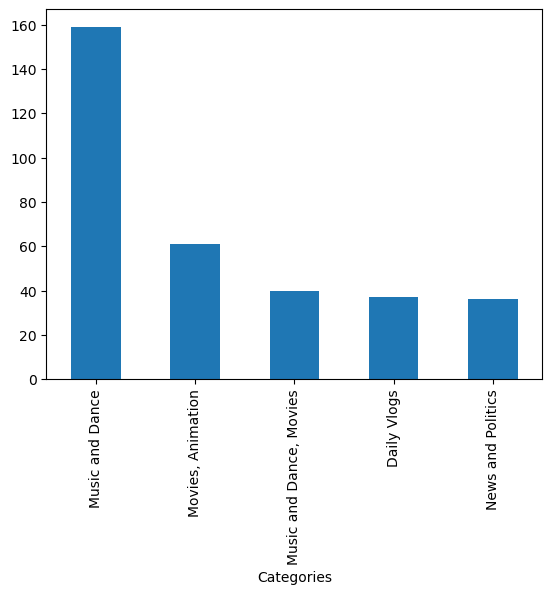

In [22]:
popular_categories[1:6].plot(kind='bar');

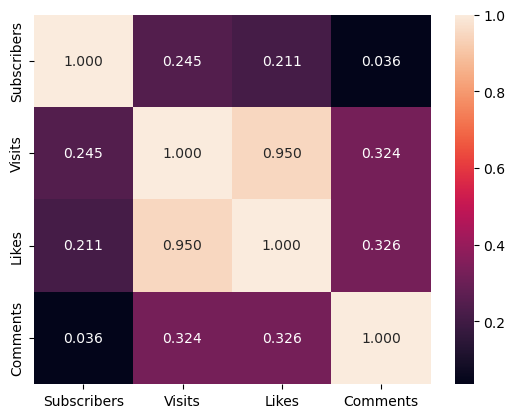

In [23]:
# to check for correlation consider the heatmap:
sns.heatmap(df.select_dtypes('number').corr(), annot=True, fmt='.3f');

#### Observations:

There is no relationship between the Subscribers, Likes and Comment but there is a strong relationship between Visits and Likes

### Audience Study:
- Analyze the distribution of streamers' audiences by country. Are there regional preferences for specific content categories?

In [24]:
df.head()

,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,tseries,Music and Dance,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,MrBeast,"Video Games, Humor",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,CoComelon,Education,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,SETIndia,Unknown,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,KidsDianaShow,"Animation, Toys",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [25]:
audience_by_country = df['Country'].value_counts()

audience_by_country.head(10)

Country
United States    292
India            241
Unknown          169
Brazil            64
Mexico            58
Indonesia         38
Russia            24
Thailand          18
Colombia          15
Philippines       13
Name: count, dtype: int64

In [74]:
# check for regional preference for specific categories
countries = ['India', 'United States', 'Unknown', 'Brazil', 'Mexico', 'Russia', 'Pakistan', 'Philippines',
             'Indonesia', 'Thailand', 'France', 'Colombia', 'Iraq', 'Japan', 'Ecuador', 'Argentina', 'Turkey',
             'Saudi Arabia', 'El Salvador', 'Bangladesh', 'United Kingdom', 'Algeria', 'Spain', 'Peru', 'Egypt',
             'Jordan', 'Morocco', 'Singapore', 'Somalia']

# create an empty list
region_cat = []

# loop through the countries
for country in countries:
#     create a list for each country
    Country = [country]
    
#   check for the top 2 categories in each country and put them in a list (checked for 2 categories because of the 
#     missing values that was filled with "Unknown", so incase it's the top for a country we ignore it and choose the second)
    top_category = df[df['Country'] == country]['Categories'].value_counts()[:2].index.tolist()
    
#     extend the top category to it Country list
    Country.extend(top_category)
    
#     append the list to the empty list created
    region_cat.append(reg_pref)
    
# create a dataframe for the region_cat
regional_preference = pd.DataFrame(country_cat, columns=['Country', 'cat1', 'cat2'])
regional_preference

,Country,cat1,cat2
0,India,Unknown,Music and Dance
1,United States,Unknown,Music and Dance
2,Unknown,Unknown,"Animation, Toys"
3,Brazil,Music and Dance,Unknown
4,Mexico,Unknown,"Movies, Animation"
5,Russia,Video Games,Unknown
6,Pakistan,Unknown,"Movies, Animation"
7,Philippines,News and Politics,Unknown
8,Indonesia,"Music and Dance, Movies",Unknown
9,Thailand,Unknown,Music and Dance


there are regional preference for specific categories. for 'India' we have 'Music and Dance', same with 'United State' and 'Brazil', for 'Mexico we have 'Movies, Animation', for 'Russia' we have 'Video Games' and so on.

### Performance Metrics:

- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [75]:
df.select_dtypes('number').mean()

Subscribers   21930382
Visits         1215601
Likes            53902
Comments          1296
dtype: float64

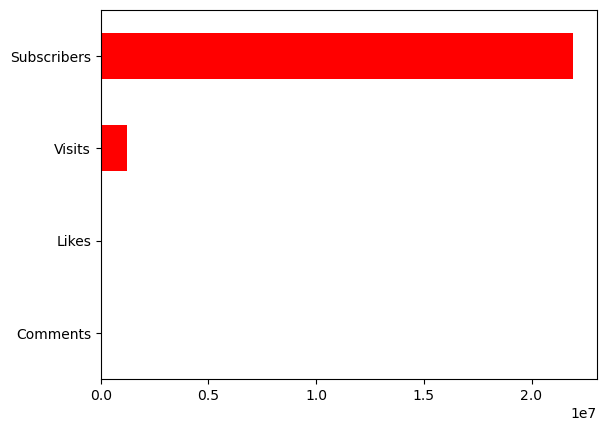

In [76]:
df.select_dtypes('number').mean().sort_values().plot(kind='barh', color='r');

There is an anomalies, the average number of Subscribers is greater than the average number of Visits and Likes.

### Content Categories:

- Explore the distribution of content categories. Which categories have the highest number of streamers?
- Are there specific categories with exceptional performance metrics?

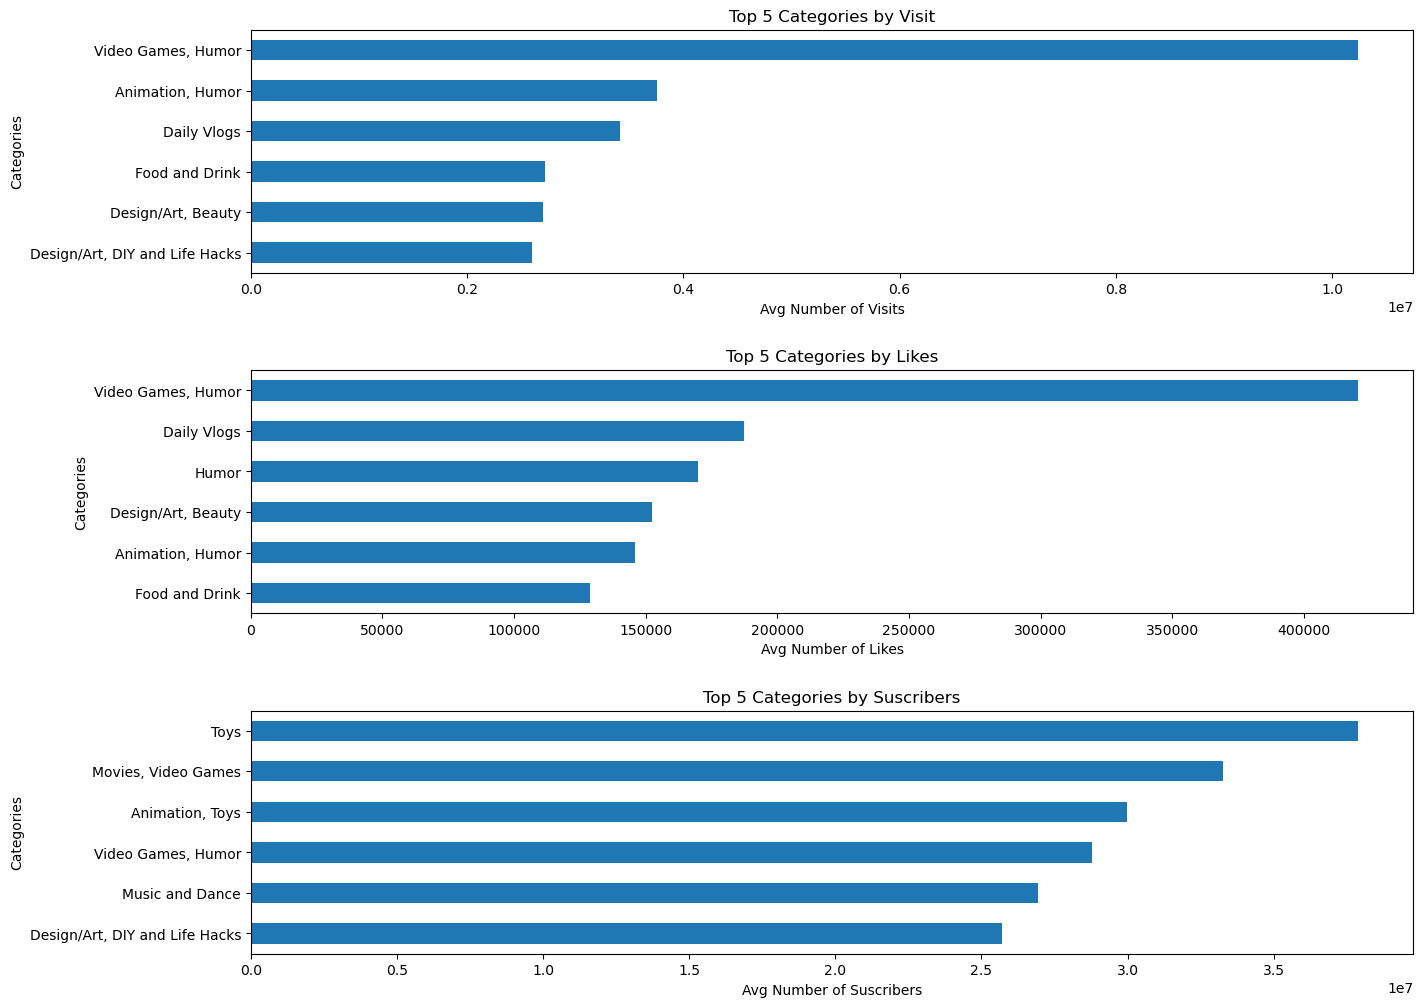

In [77]:
fig, axs = plt.subplots(figsize=(15,12), nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.4)
df.groupby('Categories')['Visits'].mean().sort_values().tail(6).plot(kind='barh', ax=axs[0])
axs[0].set_title("Top 5 Categories by Visit")
axs[0].set_xlabel("Avg Number of Visits")

df.groupby('Categories')['Likes'].mean().sort_values().tail(6).plot(kind='barh', ax=axs[1])
axs[1].set_title("Top 5 Categories by Likes")
axs[1].set_xlabel("Avg Number of Likes")

df.groupby('Categories')['Subscribers'].mean().sort_values().tail(6).plot(kind='barh', ax=axs[2])
axs[2].set_title("Top 5 Categories by Suscribers")
axs[2].set_xlabel("Avg Number of Suscribers")

plt.show()

Notice how the Top 6 Categories varies by number of Visits, Likes and Subscribers. The "Video Gaames, Humor" is consistent at the top by number of Visits and Likes.

But from our data exploration there are outliers in the data. So i'll visualize the Top 6 using the "Median"

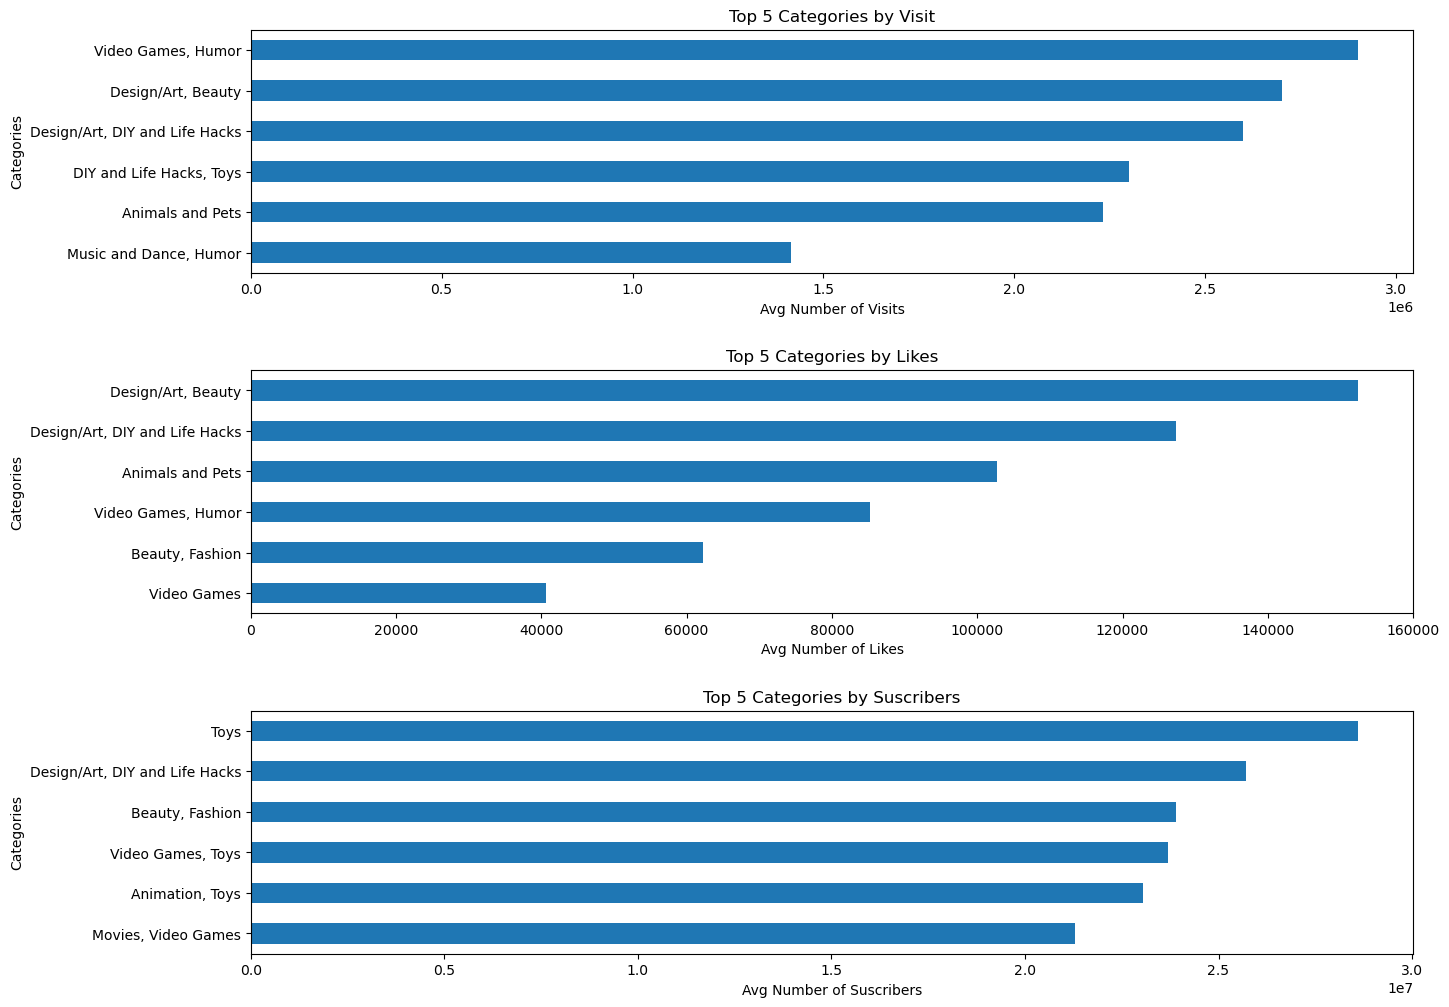

In [78]:
fig, axs = plt.subplots(figsize=(15,12), nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.4)
df.groupby('Categories')['Visits'].median().sort_values().tail(6).plot(kind='barh', ax=axs[0])
axs[0].set_title("Top 5 Categories by Visit")
axs[0].set_xlabel("Avg Number of Visits")

df.groupby('Categories')['Likes'].median().sort_values().tail(6).plot(kind='barh', ax=axs[1])
axs[1].set_title("Top 5 Categories by Likes")
axs[1].set_xlabel("Avg Number of Likes")

df.groupby('Categories')['Subscribers'].median().sort_values().tail(6).plot(kind='barh', ax=axs[2])
axs[2].set_title("Top 5 Categories by Suscribers")
axs[2].set_xlabel("Avg Number of Suscribers")

plt.show()

using the Median i discover that the Top Categories varies also but taking a closer look, it all contains the same Categories but ranking differently except for the numbers of Subscribers where the Toys appears for the first time among the Top 6, eliminating: Animal, Pets and Humor from the list.

In [24]:
# specific categories with exceptional performance metrics
df.select_dtypes('number').mean()

Subscribers   34200000
Visits         2800000
Likes           122820
Comments          3920
Name: 0.9, dtype: float64

In [82]:
subscribers, visit, likes, comments = round(df.select_dtypes('number').mean())

df_top_cat = df[(df['Subscribers'] > subscribers) & (df['Visits'] > visit) & (df['Likes'] > likes) & (df['Comments'] > comments)]


display(df_top_cat)

print("===" * 38)
print(f"Specific Categories with exceptional performance metrics are: \n\n     {df_top_cat['Categories'].unique().tolist()}")
print("===" * 38)

,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
1,MrBeast,"Video Games, Humor",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,PewDiePie,"Movies, Video Games",111500000,United States,2400000,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
26,dudeperfect,Video Games,59700000,United States,5300000,156500,4200,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,TaylorSwift,Music and Dance,54100000,United States,4300000,300400,15000,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
39,JuegaGerman,"Movies, Animation",48600000,Mexico,2000000,117100,3000,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...
43,A4a4a4a4,"Animation, Humor",47300000,Russia,9700000,330400,22000,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...
58,Mikecrack,"Movies, Animation",43400000,Mexico,2200000,183400,1800,http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...
62,KimberlyLoaiza,Music and Dance,42100000,Mexico,5300000,271300,16000,http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...
64,luisitocomunica,Unknown,41100000,Mexico,2500000,128900,1800,http://youtube.com/channel/UCECJDeK0MNapZbpaOz...
70,JessNoLimit,"Movies, Animation",39600000,Indonesia,1300000,73500,1600,http://youtube.com/channel/UCvh1at6xpV1ytYOAzx...


Specific Categories with exceptional performance metrics are: 

     ['Video Games, Humor', 'Movies, Video Games', 'Video Games', 'Music and Dance', 'Movies, Animation', 'Animation, Humor', 'Unknown', 'Animation, Video Games', 'Daily Vlogs', 'Animation', 'Design/Art, DIY and Life Hacks', 'Music and Dance, Movies']


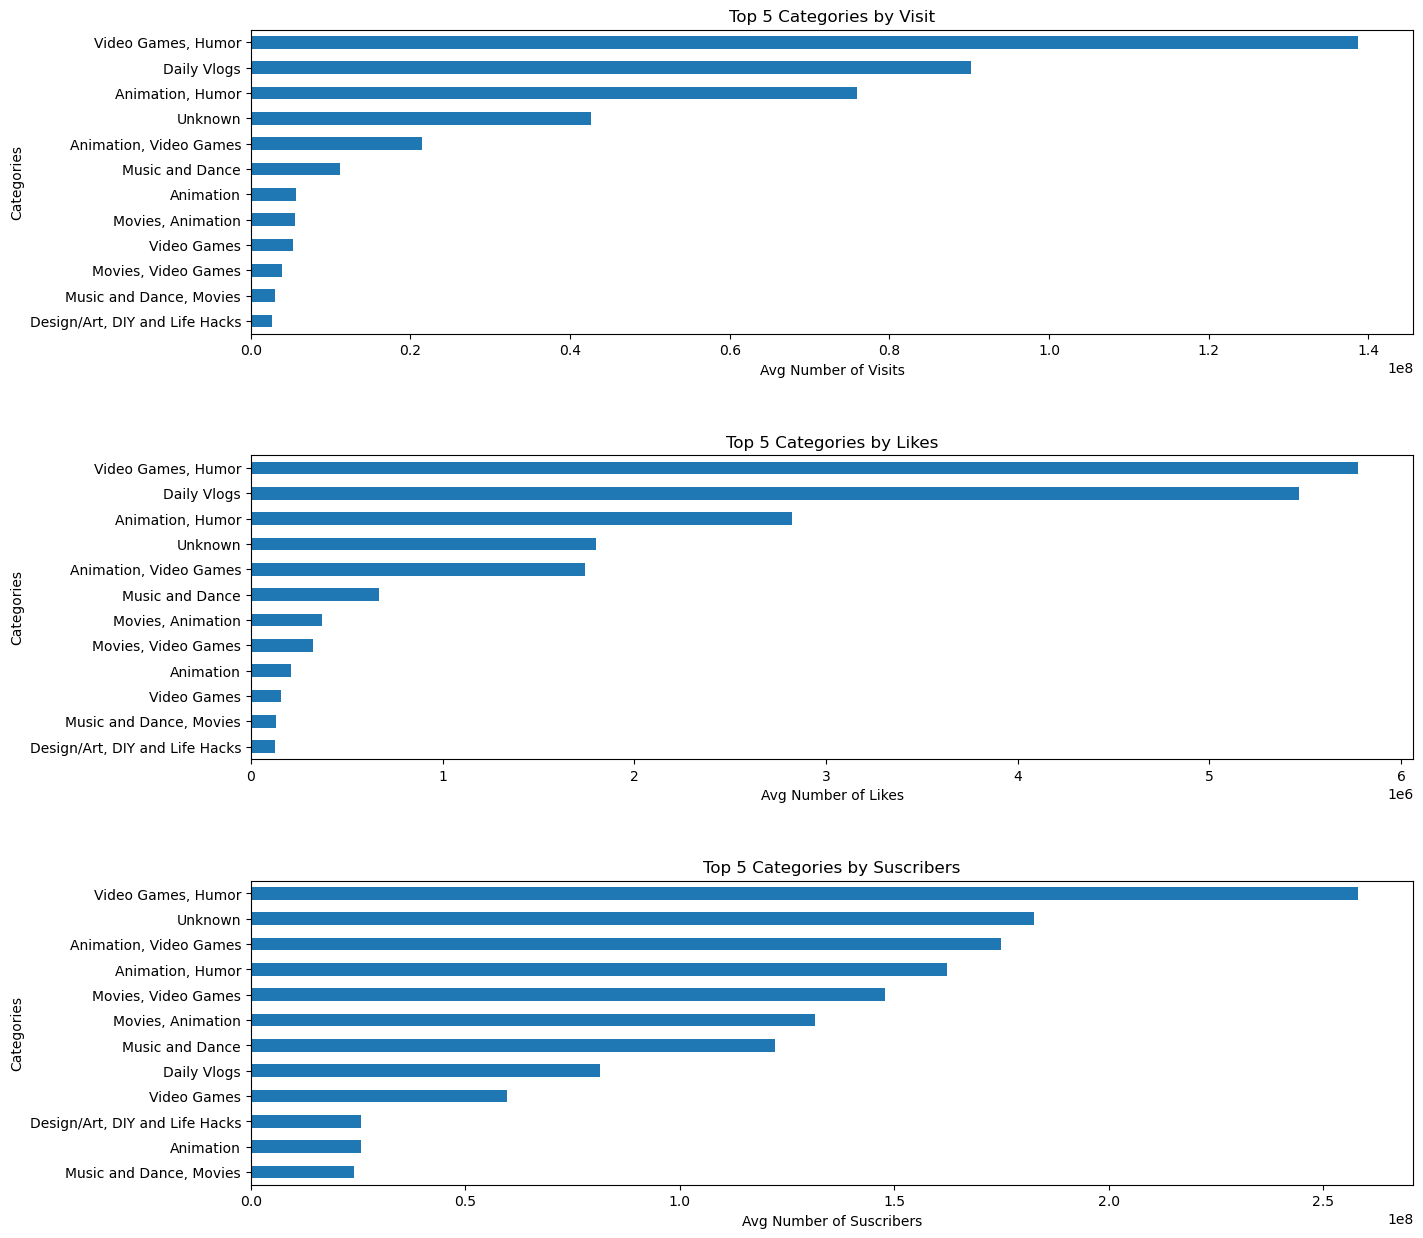

In [85]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.4)
df_top_cat.groupby('Categories')['Visits'].sum().sort_values().plot(kind='barh', ax=axs[0])
axs[0].set_title("Top 5 Categories by Visit")
axs[0].set_xlabel("Avg Number of Visits")

df_top_cat.groupby('Categories')['Likes'].sum().sort_values().plot(kind='barh', ax=axs[1])
axs[1].set_title("Top 5 Categories by Likes")
axs[1].set_xlabel("Avg Number of Likes")

df_top_cat.groupby('Categories')['Subscribers'].sum().sort_values().plot(kind='barh', ax=axs[2])
axs[2].set_title("Top 5 Categories by Suscribers")
axs[2].set_xlabel("Avg Number of Suscribers")

plt.show()

### Brands and Collaborations:

- Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

the data for brand collaborations and meeting campaigns are not provided

### Benchmarking:

- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [86]:
df.select_dtypes('number').mean()

Subscribers   21930382
Visits         1215601
Likes            53902
Comments          1296
dtype: float64

In [87]:
sub_mean, visit_mean, likes_mean, comments_mean = round(df.select_dtypes('number').mean())

df_top = df[(df['Subscribers'] > sub_mean) & (df['Visits'] > visit_mean) & (df['Likes'] > likes_mean) & (df['Comments'] > comments_mean)]

# Top performing content creators by Subscribers
df_top_sub = df_top[['Username', 'Subscribers']].nlargest(6, 'Subscribers')
display(df_top_sub)
print("===" * 38)
print(f"Top 6 content creators by numbers of subscribers are: \n      {df_top_sub['Username'].unique().tolist()}", end=(' '))

# Top performing content creators by Visits
df_top_visit = df_top[['Username', 'Visits']].nlargest(6, 'Visits')
display(df_top_visit)
print("===" * 38)
print(f"Top 6 content creators are by numbers of visit are: \n      {df_top_visit['Username'].unique().tolist()}", end=(' '))

# Top performing content creators by Likes
df_top_likes = df_top[['Username', 'Likes']].nlargest(6, 'Likes')
display(df_top_likes)
print("===" * 38)
print(f"Top 6 content creators are by numbers of likes are: \n      {df_top_likes['Username'].unique().tolist()}", end=(' '))

,Username,Subscribers
1,MrBeast,183500000
5,PewDiePie,111500000
26,dudeperfect,59700000
34,TaylorSwift,54100000
39,JuegaGerman,48600000
43,A4a4a4a4,47300000


Top 6 content creators by numbers of subscribers are: 
      ['MrBeast', 'PewDiePie', 'dudeperfect', 'TaylorSwift', 'JuegaGerman', 'A4a4a4a4'] 

,Username,Visits
1,MrBeast,117400000
136,MrBeast2,83100000
153,DaFuqBoom,52700000
287,VillageCookingChannel,21500000
277,StokesTwins,11700000
43,A4a4a4a4,9700000


Top 6 content creators are by numbers of visit are: 
      ['MrBeast', 'MrBeast2', 'DaFuqBoom', 'VillageCookingChannel', 'StokesTwins', 'A4a4a4a4'] 

,Username,Likes
1,MrBeast,5300000
136,MrBeast2,5000000
153,DaFuqBoom,1700000
123,MRINDIANHACKER,617400
238,alanbecker,582600
131,fedevigevani,412200


Top 6 content creators are by numbers of likes are: 
      ['MrBeast', 'MrBeast2', 'DaFuqBoom', 'MRINDIANHACKER', 'alanbecker', 'fedevigevani'] 

In [92]:
# Top permorming Content creator
print(df_top['Username'].value_counts().index.tolist(), end=' ')

['MrBeast', 'PewDiePie', 'CrazyXYZ', 'DanTDM', 'brentrivera', 'NichLmao', 'nickiminaj', 'AlejoIgoa', 'ZHCYT', 'rug', 'alanbecker', 'juandediospantojaa', 'DrossRotzank', 'AmiRodrigueZZ', 'StokesTwins', 'SSundee', 'souravjoshivlogs7028', 'DaFuqBoom', 'jacksepticeye', 'MrBeast2', 'luisitocomunica', 'dudeperfect', 'TaylorSwift', 'JuegaGerman', 'A4a4a4a4', 'Mikecrack', 'KimberlyLoaiza', 'JessNoLimit', 'dream', 'TotalGaming093', 'TechnoGamerzOfficial', 'markiplier', 'AboFlah', 'MRINDIANHACKER', 'fedevigevani', 'VillageCookingChannel'] 

### Content Recommendations:

- Propose a system for enhancing content recommendations to YouTube users based on streamers' categories and performance metrics.